In [341]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.stats as sm
pd.set_option('display.max_rows', 500)

In [342]:
print('\tAre Hurricanes becoming more frequent in occurrence and stronger over time ? A preliminary examination of data provided through', 
    'Kaggle suggests Hurricane behavior has changed over the last one hundred and seventy years.  However we are not provided some important',
    'data for that research.',  
        '\n\n\tClimate change has been shown to be impacting characteristics and behavior of tropical storms and weather patterns.  There',
    'exists a likelihood that storms will grow stronger over time, requiring the need for new Hurricane classifications.  Category 5',
    'Hurricanes are represented by winds in excess of 252 km/h.  At these speeds, many man-made structures close to the shoreline can ',
    'be flattened.  If storms begin to consistently achieve speeds markedly greater than the 252 km/h Category 5 threshold, Category 6',
    'classification is a possibility.',
        '\n\n\tKaggle makes available data about Atlantic and Pacific storms going back to 1851.  Atlantic data is exhuastive, Pacific data',
    'begins in 1949.  Further, storm strength is limited to maximum wind readings.  No data is provided for hurricane impact.  Initially',
    'our goal will be to obtain more exhaustive storm data, focusing on hurricane level storms.  Our goal would be to assess the ',
    'change in frequency of hurricanes across both the Atlantic and the Pacific, with further analysis into any changes in hurricane',
    'strength and impact.  Namely, are hurricanes occurring more frequently over time, and are they becoming stronger?')

	Are Hurricanes becoming more frequent in occurrence and stronger over time ? A preliminary examination of data provided through Kaggle suggests Hurricane behavior has changed over the last one hundred and seventy years.  However we are not provided some important data for that research. 

	Climate change has been shown to be impacting characteristics and behavior of tropical storms and weather patterns.  There exists a likelihood that storms will grow stronger over time, requiring the need for new Hurricane classifications.  Category 5 Hurricanes are represented by winds in excess of 252 km/h.  At these speeds, many man-made structures close to the shoreline can  be flattened.  If storms begin to consistently achieve speeds markedly greater than the 252 km/h Category 5 threshold, Category 6 classification is a possibility. 

	Kaggle makes available data about Atlantic and Pacific storms going back to 1851.  Atlantic data is exhuastive, Pacific data begins in 1949.  Further, storm stre

In [343]:
# import
atlantic=pd.read_csv('../../../prep_course/atlantic.csv', usecols=['ID', 'Date', 'Status', 'Maximum Wind'])
pacific=pd.read_csv('../../../prep_course/pacific.csv', usecols=['ID', 'Date', 'Status', 'Maximum Wind'])

In [353]:
print('Our hypotheses would look like the following: ', 
     '\n\nn1: hurricanes becoming more frequent over time - significant difference in hurricane frequency between time periods 1851-1987 and 1988-2015',
     '\nn0: no significant difference in hurricane frequencies betwen the time periods',
     '\n\nBreaking apart the data between two time periods, we could test differences at various break-points.  In this',
     'example analysis with current data we use 1988 as the cut-off.  1988 is the year the Intergovernmental Panel on Climat Change ',
     'was established.')

Our hypotheses would look like the following:  

n1: hurricanes becoming more frequent over time - significant difference in hurricane frequency between time periods 1851-1987 and 1988-2015 
n0: no significant difference in hurricane frequencies betwen the time periods 

Breaking apart the data between two time periods, we could test differences at various break-points.  In this example analysis with current data we use 1988 as the cut-off.  1988 is the year the Intergovernmental Panel on Climat Change  was established.


In [345]:
# hurricanes aggregation, groupby date, unique IDs and summary stats

atlantic = atlantic[atlantic.Status == ' HU']
atlantic = atlantic.astype({'Date': str})

pacific = pacific[pacific.Status == ' HU']
pacific = pacific.astype({'Date': str})

hurricanes = pd.concat([atlantic, pacific])
hurricanes = hurricanes.groupby([hurricanes.Date.str[:4]])

In [346]:
print('\tFocus is on storms with hurricane status.  We have {} recorded hurricanes since 1851.  {} over the Atlantic since the start of data collection and {} over the Pacific since 1949.'.format(
         hurricanes['ID'].nunique().sum(), 
         atlantic.groupby([atlantic.Date.str[:4]])['ID'].nunique().sum(),
         pacific.groupby([pacific.Date.str[:4]])['ID'].nunique().sum()))

	Focus is on storms with hurricane status.  We have 1398 recorded hurricanes since 1851.  891 over the Atlantic since the start of data collection and 507 over the Pacific since 1949.


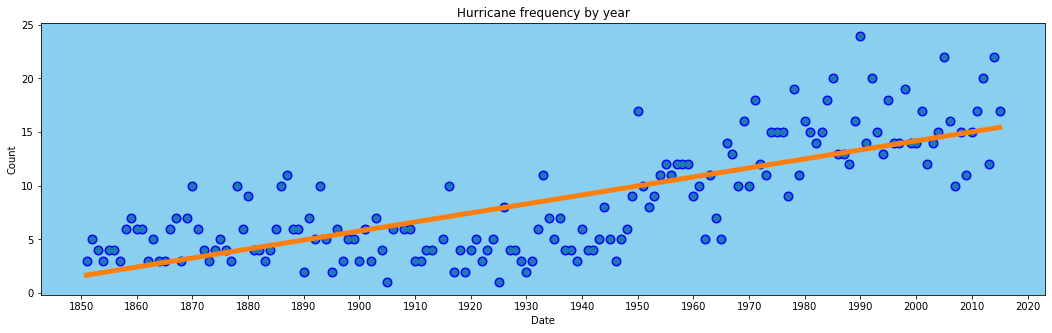

In [363]:
# plot frequency by year 

# total
plt.figure(figsize=(18,5))
ax = plt.subplot() 
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.set_facecolor('#89cff0')

x_values = np.array(list(hurricanes.groups.keys())).astype(np.int)
y_values = hurricanes['ID'].nunique().tolist()

plt.scatter(x_values, y_values, marker='o', alpha=1, s=80, c='blue', edgecolors='blue')
plt.xlabel('Date')
plt.ylabel('Count')

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
line = slope*x_values+intercept
plt.plot(x_values,y_values,'o', x_values, line,linewidth=5)

plt.title('Hurricane frequency by year')
plt.show()

In [354]:
# Atlantic + Pacific z-test for n0
hurricanes_frame = hurricanes['ID'].nunique().reset_index()

# 1851-1987
hurricanes_period_one = hurricanes_frame[(hurricanes_frame.Date >= '1851') & (hurricanes_frame.Date <= '1987')]
# 1988 - 2015
hurricanes_period_two = hurricanes_frame[(hurricanes_frame.Date >= '1988') & (hurricanes_frame.Date <= '2015')]

ztest_all, pval1_all = sm.weightstats.ztest(hurricanes_period_one['ID'], hurricanes_period_two['ID'])

print('\tComparing the means of the available data we find a zscore of {} at a very statistically significant power of {}'.format(ztest_all, pval1_all),
     'Since Pacific data begins in 1949, we should isolate the Atlantic data to isolate for potential confounding data from Pacific\'s inclusion')

	Comparing the means of the available data we find a zscore of -10.053289885844165 at a very statistically significant power of 8.885062420078363e-24 Since Pacific data begins in 1949, we should isolate the Atlantic data to isolate for potential confounding data from Pacific's inclusion


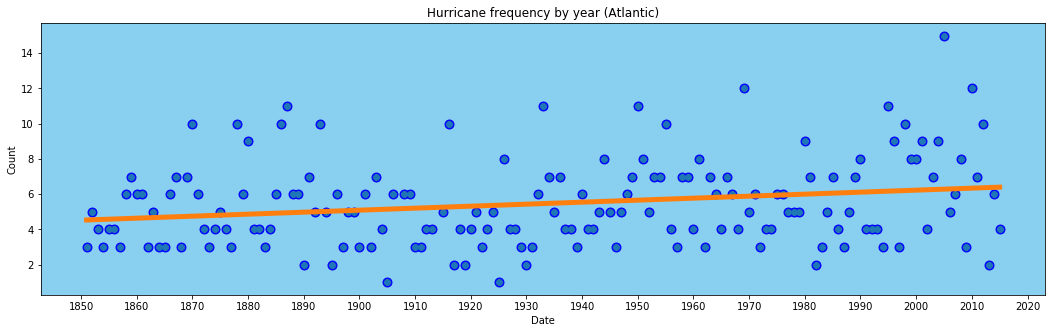

In [362]:
# Atlantic only - control for Pacific inclusion

atlantic_only = atlantic.groupby([atlantic.Date.str[:4]])

plt.figure(figsize=(18,5))
ax = plt.subplot() 
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.set_facecolor('#89cff0')

x_values = np.array(list(atlantic_only.groups.keys())).astype(np.int)
y_values = atlantic_only['ID'].nunique().tolist()

plt.scatter(x_values, y_values, marker='o', alpha=1, s=80, c='blue', edgecolors='blue')
plt.xlabel('Date')
plt.ylabel('Count')

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values,y_values)
line = slope*x_values+intercept
plt.plot(x_values,y_values,'o', x_values, line,linewidth=5)

plt.title('Hurricane frequency by year (Atlantic)')
plt.show()

In [355]:
atlantic_frame = atlantic_only['ID'].nunique().reset_index()

# 1851-1987
atlantic_period_one = atlantic_frame[(atlantic_frame.Date >= '1851') & (atlantic_frame.Date <= '1987')]
# 1988 - 2015
atlantic_period_two = atlantic_frame[(atlantic_frame.Date >= '1988') & (atlantic_frame.Date <= '2015')]

ztest_atlantic, pval1_atlantic = sm.weightstats.ztest(atlantic_period_one.ID, atlantic_period_two.ID)

print('\tComparing the means of the available data for the Atlantic we find a zscore of {} at a statistically significant power of {}'.format(ztest_atlantic, pval1_atlantic),
     'With the Atlantic + Pacific data, as well as Atlantic data alone all showing a rejection of the null hypothesis - seems likely',
     'the addition of Pacific data back to 1851 would maintain statistically significant differences between the means of hurricane frequencies between the two time periods.')

	Comparing the means of the available data for the Atlantic we find a zscore of -3.267113807741727 at a statistically significant power of 0.0010864999299279548 With the Atlantic + Pacific data, as well as Atlantic data alone all showing a rejection of the null hypothesis - seems likely the addition of Pacific data back to 1851 would maintain statistically significant differences between the means of hurricane frequencies between the two time periods.


In [356]:
# conclusion

print('\tThe available data looks promising for rejection of the null hypothesis and concluding with support for the notion',
     'that hurricane occurrence is increasing over time.  We would benefit from obtaining more data for the Pacific going back',
     'to 1851 as this would also allow for more meaningful comparisons at various yearly thresholds, instead of solely focusing on 1988.',
     'Maximum Wind analysis is possible with the available data not counting for the late Pacific inclusion.  Obtaining more data',
     'representing hurricane strength and impact would allow for further support for the notion that hurricanes are also strengthening',
     'over time.  Cross-analysis with climate change data would allow for correlations between warming weather and other weather pattern changes',
     'and changes in hurricane characteristics.  Given the data available there is support for concluding hurricanes are becoming more frequent',
     'both over the Atlantic and as a whole.')

	The available data looks promising for rejection of the null hypothesis and concluding with support for the notion that hurricane occurrence is increasing over time.  We would benefit from obtaining more data for the Pacific going back to 1851 as this would also allow for more meaningful comparisons at various yearly thresholds, instead of solely focusing on 1988. Maximum Wind analysis is possible with the available data not counting for the late Pacific inclusion.  Obtaining more data representing hurricane strength and impact would allow for further support for the notion that hurricanes are also strengthening over time.  Cross-analysis with climate change data would allow for correlations between warming weather and other weather pattern changes and changes in hurricane characteristics.  Given the data available there is support for concluding hurricanes are becoming more frequent both over the Atlantic and as a whole.
